# Bank Marketing Campaign Outcome Prediction

### Abstract:

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

### Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

### Attribute Information: 

#### Input variables: 

##### bank client data: 

1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
##### related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. 
Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

##### other attributes:

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

##### social and economic context attributes: 

16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)


#### Output variable (desired target):

21. y - has the client subscribed a term deposit? (binary: 'yes','no')

### Data Source: 

http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

### Importing the required libraries: 

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as skm
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, precision_score, roc_auc_score, confusion_matrix

### Reading the data into a dataframe:

In [88]:
bank_marketing = pd.read_csv('bank-additional-full.csv', sep = ';')

### Data Exploration: 

In [89]:
bank_marketing.shape

(41188, 21)

In [90]:
bank_marketing=bank_marketing.replace([np.inf, -np.inf], np.nan)

In [91]:
bank_marketing=bank_marketing.dropna()

In [92]:
bank_marketing.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [93]:
bank_marketing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [94]:
bank_marketing.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [95]:
bank_marketing.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [96]:
bank_marketing.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [97]:
bank_marketing.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [98]:
bank_marketing.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

It can be seen that the columns follow different naming conventions - day_of_week and emp.var.rate
So, renaming the columns will help us bring in more consistency.

In [99]:
bank_marketing = bank_marketing.rename(columns= {"emp.var.rate":"emp_var_rate",
                             "cons.price.idx": "cons_price_idx",
                             "cons.conf.idx": "cons_conf_idx",
                             "nr.employed": "nr_employed"})

In [100]:
duplicate_rows = bank_marketing[bank_marketing.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicate_rows)

Duplicate Rows except first occurrence based on all columns are :
       age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   45       admin.   married    university.degree

In [101]:
bank_marketing.drop_duplicates(keep=False,inplace=True)

In [102]:
duplicate_rows_check = bank_marketing[bank_marketing.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicate_rows_check)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact, month, day_of_week, duration, campaign, pdays, previous, poutcome, emp_var_rate, cons_price_idx, cons_conf_idx, euribor3m, nr_employed, y]
Index: []

[0 rows x 21 columns]


Text(0.5, 1, 'Heatmap for highest correlated features in Bank Marketing data')

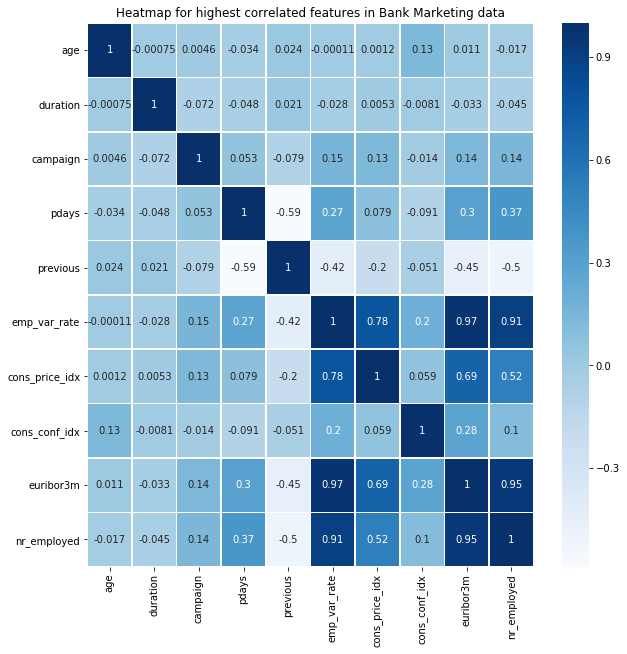

In [103]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(bank_marketing.corr(), cmap="Blues",annot=True, linewidths=.5)
plt.title("Heatmap for highest correlated features in Bank Marketing data")

### Exploring Variables 

#### y - has the client subscribed a term deposit? 

In [104]:
print('Number of yes:',sum(bank_marketing.y=='yes'))
print('Percentage',sum(bank_marketing.y=='yes')/bank_marketing.y.count())

Number of yes: 4638
Percentage 0.11267126615489262


In [105]:
bank_marketing.y = bank_marketing.y.replace(['yes','no'],[1,0])

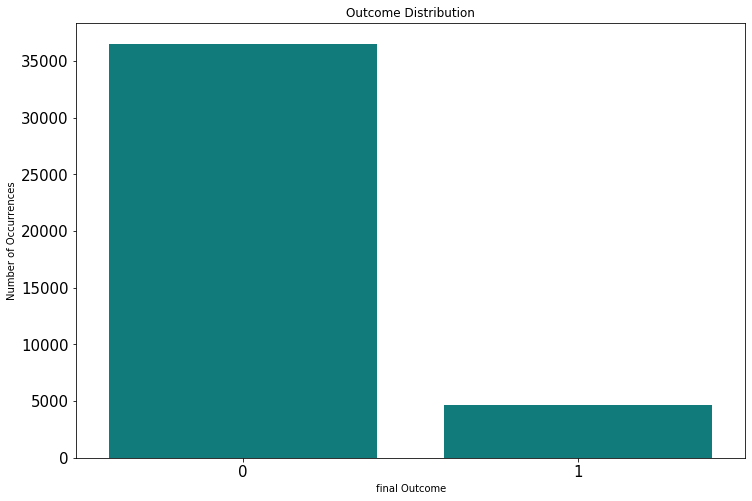

In [106]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.countplot(x = 'y', data = bank_marketing, color = 'darkcyan')
ax.set_xlabel('final Outcome')
ax.set_ylabel('Number of Occurrences')
ax.set_title('Outcome Distribution')
ax.tick_params(labelsize=15)

It is clear that the outcome in the dataset is highly imbalanced. For imbalanced data sets, accuracy alone won't cut is as the metric to measure the model. This is a case where we need to avoid false positives as we want to be sure about people who can invest in term deposits with the bank. Since our goal is to reduce the False Positives, precision is a good metric to track.

#### Age 

In [107]:
print('Min age: ', bank_marketing['age'].max())
print('Max age: ', bank_marketing['age'].min())
print('Null Values: ', bank_marketing['age'].isnull().any())

Min age:  98
Max age:  17
Null Values:  False


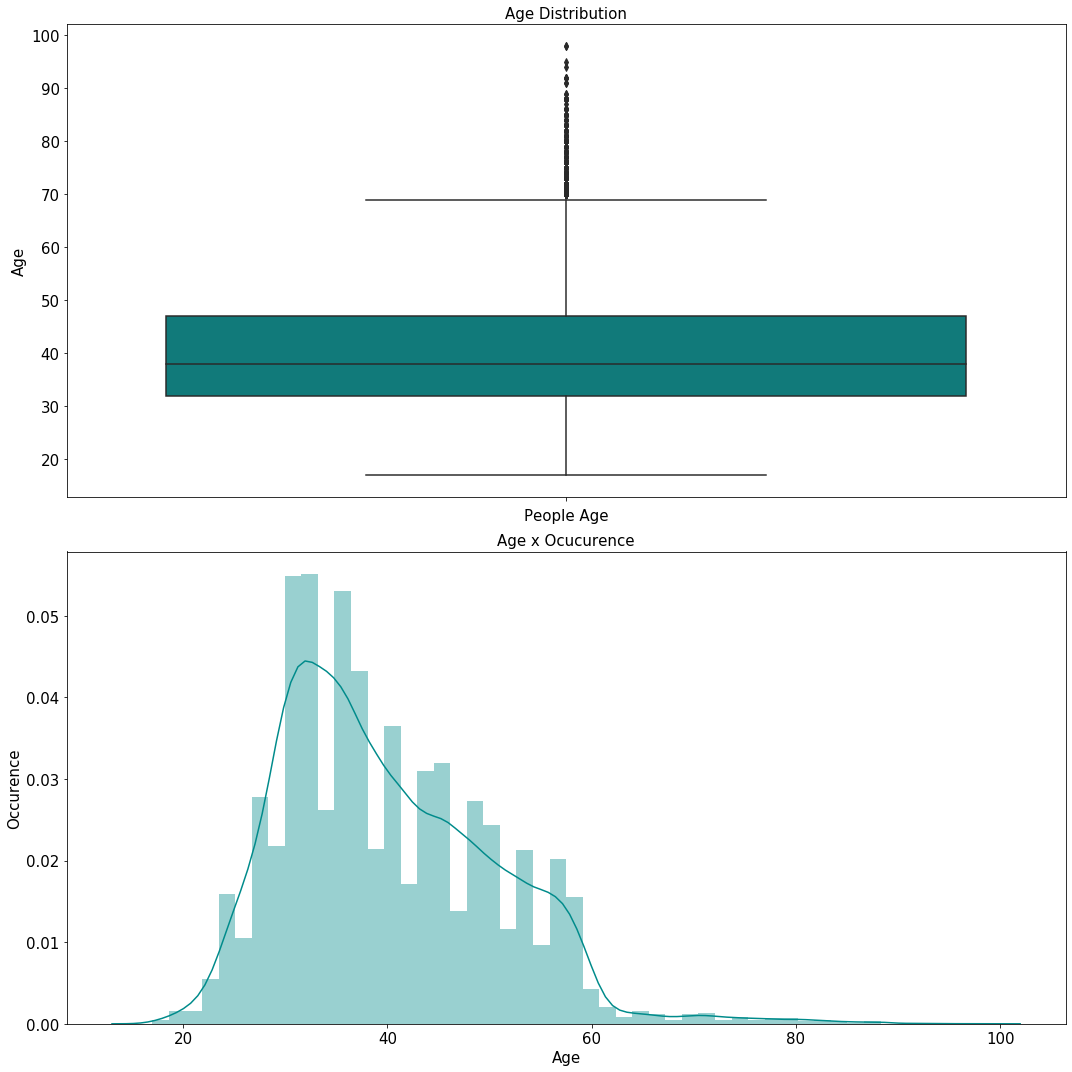

In [108]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (15, 15))
sns.boxplot(x = 'age', data = bank_marketing, orient = 'v', ax = ax1, color = 'darkcyan')
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(bank_marketing['age'], ax = ax2, color = 'darkcyan')
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

#### Job

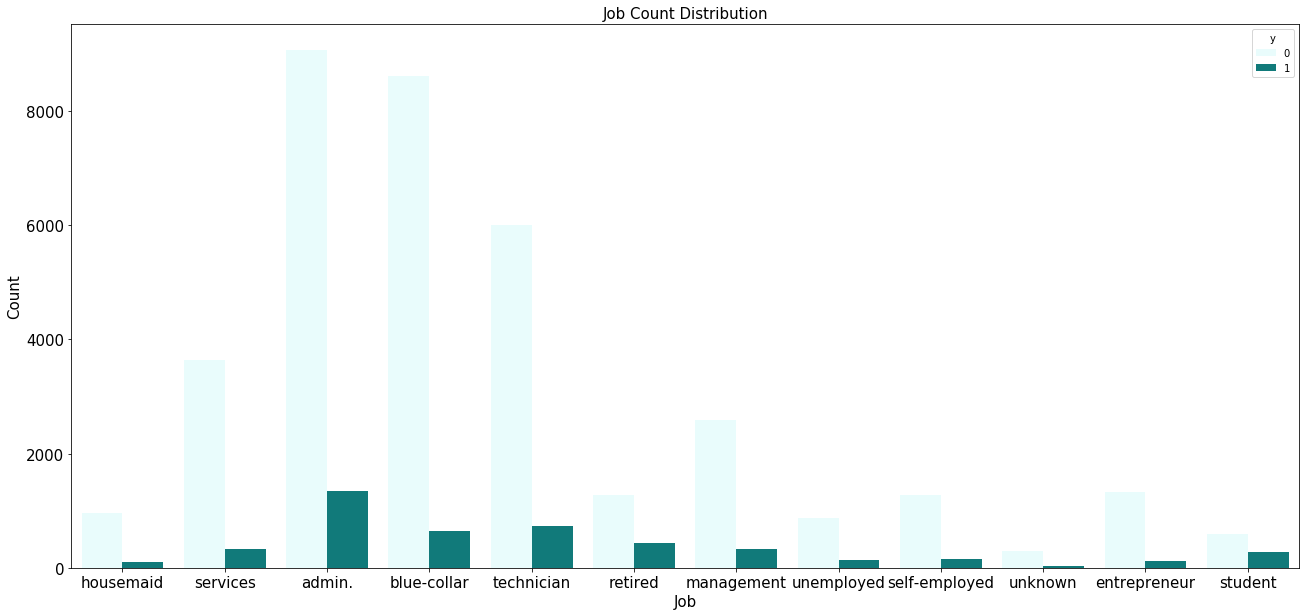

In [109]:
fig, ax = plt.subplots()
fig.set_size_inches(22, 10)
sns.countplot(x = 'job',hue = 'y', data = bank_marketing, color = 'darkcyan')
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)

In [110]:
bank_marketing.groupby(['job', 'y'])['y'].count()

job            y
admin.         0    9066
               1    1350
blue-collar    0    8614
               1     638
entrepreneur   0    1332
               1     124
housemaid      0     954
               1     106
management     0    2596
               1     328
retired        0    1282
               1     434
self-employed  0    1272
               1     149
services       0    3642
               1     323
student        0     600
               1     275
technician     0    6005
               1     730
unemployed     0     870
               1     144
unknown        0     293
               1      37
Name: y, dtype: int64

#### Marital Status

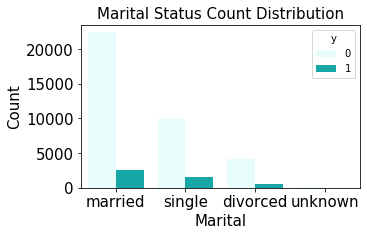

In [111]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 3)
sns.countplot(x = 'marital', hue='y', data = bank_marketing, color = 'c')
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital Status Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)

#### Education

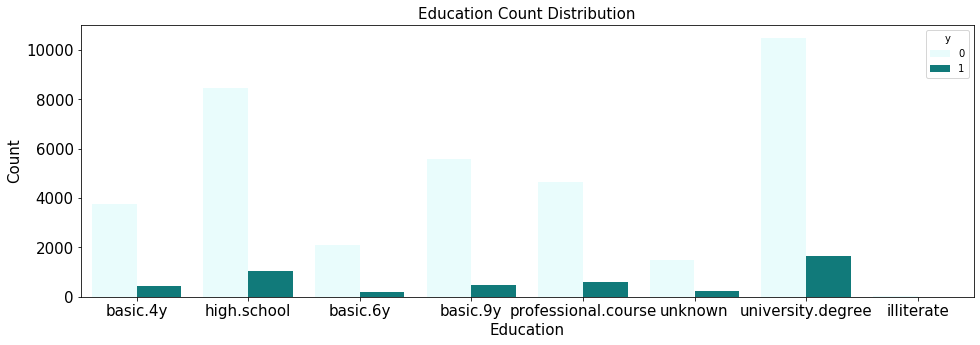

In [112]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 5)
sns.countplot(x = 'education', hue='y', data = bank_marketing, color = 'darkcyan')
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)

In [113]:
print('Original : ',bank_marketing.education.unique())
print(sum(bank_marketing.education=='unknown'))

sum(bank_marketing.education=='unknown')/bank_marketing.education.count()

Original :  ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
1729


0.04200272082402099

In [114]:
bank_marketing.education=bank_marketing.education.replace(['illiterate','basic.4y','basic.6y', 'basic.9y', 'high.school', 'university.degree',
                                             'professional.course', 'unknown'],[0,1,2,3,4,5,6,5])

print('Changed : ',bank_marketing.education.unique())

Changed :  [1 4 2 3 6 5 0]


#### Default 

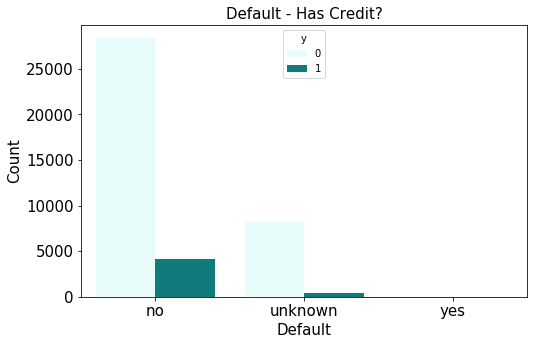

In [115]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
sns.countplot(x = 'default',hue='y', data = bank_marketing, order = ['no', 'unknown', 'yes'], color = 'darkcyan')
ax.set_xlabel('Default', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Default - Has Credit?', fontsize=15)
ax.tick_params(labelsize=15)

In [116]:
bank_marketing[bank_marketing.default == 'no'][['y','default']].groupby('y').count()

,default
y,
0,28371
1,4195


In [117]:
bank_marketing[bank_marketing.default == 'yes'][['y','default']].groupby('y').count()

,default
y,
0,3


In [118]:
bank_marketing[bank_marketing.default == 'unknown'][['y','default']].groupby('y').count()

,default
y,
0,8152
1,443


#### Housing 

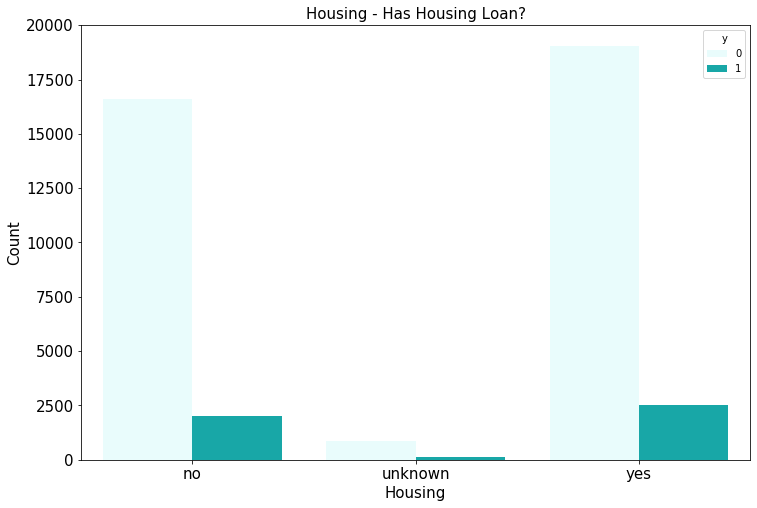

In [119]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.countplot(x = 'housing',hue='y', data = bank_marketing, order = ['no', 'unknown', 'yes'], color = 'c')
ax.set_xlabel('Housing', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Housing - Has Housing Loan?', fontsize=15)
ax.tick_params(labelsize=15)

In [120]:
print('Original : ',bank_marketing.housing.unique())
print('Percentage of Unknown',sum(bank_marketing.housing=='unknown')/bank_marketing.education.count())
bank_marketing[['y','housing']].groupby('housing').count()

Original :  ['no' 'yes' 'unknown']
Percentage of Unknown 0.024050140899815373


,y
housing,
no,18608
unknown,990
yes,21566


In [121]:
bank_marketing.housing = bank_marketing.housing.replace(['unknown'],['yes'])

bank_marketing[['y','housing']].groupby('housing').count()

,y
housing,
no,18608
yes,22556


#### Loan

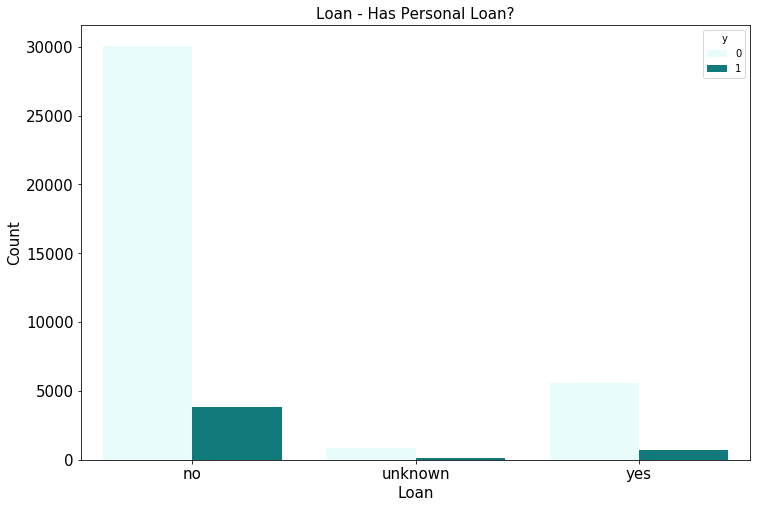

In [122]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.countplot(x = 'loan',hue='y', data = bank_marketing, order = ['no', 'unknown', 'yes'], color = 'darkcyan')
ax.set_xlabel('Loan', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Loan - Has Personal Loan?', fontsize=15)
ax.tick_params(labelsize=15)

In [123]:
print('Original : ',bank_marketing.loan.unique())
print('Percentage of Unknown',sum(bank_marketing.loan=='unknown')/bank_marketing.loan.count())
bank_marketing[['y','loan']].groupby('loan').count()

Original :  ['no' 'yes' 'unknown']
Percentage of Unknown 0.024050140899815373


,y
loan,
no,33926
unknown,990
yes,6248


#### pdays 

In [124]:
print('Number of 999 (Not contacted before) in pdays:',sum(bank_marketing.pdays==999))
print('Percentage',sum(bank_marketing.pdays==999)/bank_marketing.pdays.count())

Number of 999 (Not contacted before) in pdays: 39649
Percentage 0.9631959965017977


In [125]:
bank_marketing.groupby('pdays')['pdays'].count()

pdays
0         15
1         26
2         61
3        439
4        118
5         46
6        412
7         60
8         18
9         64
10        52
11        28
12        58
13        36
14        20
15        24
16        11
17         8
18         7
19         3
20         1
21         2
22         3
25         1
26         1
27         1
999    39649
Name: pdays, dtype: int64

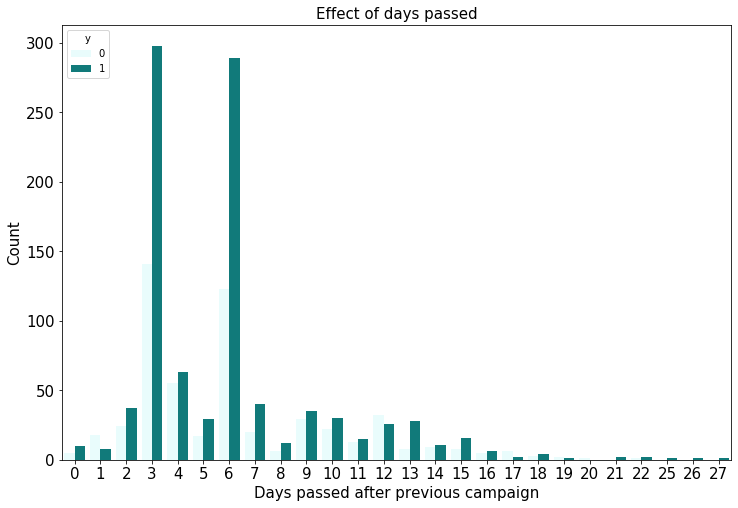

In [126]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.countplot(x = 'pdays', hue='y', data = bank_marketing[bank_marketing.pdays != 999], color = 'darkcyan')
ax.set_xlabel('Days passed after previous campaign', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Effect of days passed', fontsize=15)
ax.tick_params(labelsize=15)

In [128]:
# bank_marketing['pdays_new'] = 0
# i=0
# for p in bank_marketing.pdays:
#     if (p <= 10):
#         bank_marketing.loc[i, 'pdays_new'] = 1
#     elif (p >= 11) & (p <= 20):
#         bank_marketing.loc[i, 'pdays_new'] = 2
#     elif (p >= 21) & (p <= 27):
#         bank_marketing.loc[i, 'pdays_new'] = 3
#     i=i+1

In [129]:
bank_marketing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41164 entries, 0 to 41187
Data columns (total 21 columns):
age               41164 non-null int64
job               41164 non-null object
marital           41164 non-null object
education         41164 non-null int64
default           41164 non-null object
housing           41164 non-null object
loan              41164 non-null object
contact           41164 non-null object
month             41164 non-null object
day_of_week       41164 non-null object
duration          41164 non-null int64
campaign          41164 non-null int64
pdays             41164 non-null int64
previous          41164 non-null int64
poutcome          41164 non-null object
emp_var_rate      41164 non-null float64
cons_price_idx    41164 non-null float64
cons_conf_idx     41164 non-null float64
euribor3m         41164 non-null float64
nr_employed       41164 non-null float64
y                 41164 non-null int64
dtypes: float64(5), int64(7), object(9)
memory usage:

#### One Hot Encoding or Mapping the Categorical Variables 

In [130]:
bank_marketing =bank_marketing.drop(['euribor3m','nr_employed','duration'],axis=1)

In [131]:
bank_marketing = pd.get_dummies(bank_marketing,columns=['default','job','marital','housing','loan','contact','month','day_of_week',
                                                'poutcome'],
                               prefix=['def','job','marry','house','lon','ph','month','wkday','pout'])

In [132]:
bank_marketing.shape

(41164, 53)

In [133]:
bank_marketing.head()

,age,education,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,y,def_no,...,month_oct,month_sep,wkday_fri,wkday_mon,wkday_thu,wkday_tue,wkday_wed,pout_failure,pout_nonexistent,pout_success
0,56,1,1,999,0,1.1,93.994,-36.4,0,1,...,0,0,0,1,0,0,0,0,1,0
1,57,4,1,999,0,1.1,93.994,-36.4,0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,4,1,999,0,1.1,93.994,-36.4,0,1,...,0,0,0,1,0,0,0,0,1,0
3,40,2,1,999,0,1.1,93.994,-36.4,0,1,...,0,0,0,1,0,0,0,0,1,0
4,56,4,1,999,0,1.1,93.994,-36.4,0,1,...,0,0,0,1,0,0,0,0,1,0


In [134]:
# bank_marketing.drop(['job', 'education','marital', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'], axis = 1, inplace = True)

In [135]:
bank_marketing.dtypes

age                    int64
education              int64
campaign               int64
pdays                  int64
previous               int64
emp_var_rate         float64
cons_price_idx       float64
cons_conf_idx        float64
y                      int64
def_no                 uint8
def_unknown            uint8
def_yes                uint8
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
marry_divorced         uint8
marry_married          uint8
marry_single           uint8
marry_unknown          uint8
house_no               uint8
house_yes              uint8
lon_no                 uint8
lon_unknown            uint8
lon_yes                uint8
ph_cellular            uint8
ph_telephone  

## Preprocessing For Model Fitting:

### Sampling: 

In [136]:
bank_marketing = pd.DataFrame.sample(bank_marketing,frac=0.3,random_state=0)
bank_marketing.shape

(12349, 53)

### Importing required packages for modelling:

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [138]:
import warnings
warnings.filterwarnings('ignore') 

### Features and Target: 

In [139]:
y = bank_marketing['y']
X = bank_marketing.drop(['y'], axis = 1)

### Scale and Split

In [140]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [141]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

In [142]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [143]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
X_train_reduced_Bf = pca.fit_transform(X_train)
pca.n_components_

25

In [144]:
pca = PCA(n_components = pca.n_components_)
X_train_reduced_Bf = pca.fit_transform(X_train)
X_test_reduced_Bf = pca.transform(X_test)
print(X_train_reduced_Bf.shape)
print(X_test_reduced_Bf.shape)

(9261, 25)
(3088, 25)


## Classification Models 

### Dummy Classifier 

In [145]:
from sklearn.dummy import DummyClassifier
dc = DummyClassifier()
dc.strategy = 'most_frequent'
dc.fit(X_train,y_train)
dc.score(X_train,y_train)

y_pr = pd.DataFrame(y_test)
y_pr = y_pr.replace([1],[0])

skm.confusion_matrix(y_test, dc.predict(X_test),labels=[1,0])

array([[   0,  347],
       [   0, 2741]], dtype=int64)

In [146]:
models = {
        "KNN-Classifier": KNeighborsClassifier(),
        "Logistic Reg": LogisticRegression(),
        "LinearSVC": LinearSVC(),
        "SVM Kernelized": SVC(probability = True),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        }

In [147]:
params = {
        "KNN-Classifier": {'n_neighbors': [3, 5, 8, 10, 15, 20]},
    
        "Logistic Reg": {'C': [0.01, 0.1, 1, 10, 25],
                  'solver': ['lbfgs','liblinear', 'saga']},
    
        "LinearSVC": {'C': [0.01, 0.1, 1, 10]},
    
        "SVM Kernelized": {'C': [1, 10, 15], 'gamma': [0.01, 0.1, 1], 'kernel': ['rbf']},
    
        "Decision Tree": {'max_depth': [1, 2, 4, 10, 25], 
            'criterion': ['gini', 'entropy'], 
            'max_features': ['auto', 'log2']},
    
        "Random Forest": {'max_depth': [1, 2, 4, 10, 25], 
            'criterion': ['gini', 'entropy'], 
            'max_features': ['auto', 'log2']},
        }

In [148]:
def run_models (X_train, X_test, models, params, scoring) : 
    Classification_Result=pd.DataFrame(columns=['Model','Best_Parameter','Training_score','Testing_score','F1_score','Recall','Precision','AUC Value'],
                                   index=['KNN-Classifier','Logistic Reg','LinearSVC','SVM Kernelized','Decision Tree','Random Forest'])
    plt.figure(figsize=(10, 8))
    
    for model_name, model in models.items():
            grid_search = GridSearchCV(model, params[model_name], cv=3, n_jobs=-1, scoring = scoring)
            grid_search.fit(X_train, y_train)

            print("Model:", model_name)
            print("Parameter(Optimum): {}".format(grid_search.best_params_))
            print("Cross-validation score: {:.2f}".format(grid_search.best_score_))

            best_model = grid_search.best_estimator_
            best_model.fit(X_train, y_train)
            y_pred = best_model.predict(X_test)
            
            print(skm.confusion_matrix(y_test, y_pred,labels=[1,0]))
            
            Classification_Result.loc[model_name] =[model_name,grid_search.best_params_,best_model.score(X_train, y_train),
                                                    best_model.score(X_test, y_test),
                                                    skm.f1_score(y_test,y_pred),
                                                    skm.recall_score(y_test,y_pred),
                                                    skm.precision_score(y_test,y_pred),
                                                    skm.roc_auc_score(y_test,y_pred)
                                                   ]
            if model_name != 'LinearSVC':
                y_train_prob = best_model.predict_proba(X_train)
                fpr, tpr, threshold = roc_curve(y_train, y_train_prob[:,1])
                plt.plot(fpr, tpr, label = model_name)
                    
                    
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.legend()
    return Classification_Result.sort_values(by='F1_score',ascending = False)

Model: KNN-Classifier
Parameter(Optimum): {'n_neighbors': 3}
Cross-validation score: 0.30
[[  77  270]
 [ 111 2630]]
Model: Logistic Reg
Parameter(Optimum): {'C': 25, 'solver': 'lbfgs'}
Cross-validation score: 0.35
[[  85  262]
 [  47 2694]]
Model: LinearSVC
Parameter(Optimum): {'C': 10}
Cross-validation score: 0.33
[[  73  274]
 [  34 2707]]
Model: SVM Kernelized
Parameter(Optimum): {'C': 15, 'gamma': 0.1, 'kernel': 'rbf'}
Cross-validation score: 0.38
[[ 100  247]
 [  96 2645]]
Model: Decision Tree
Parameter(Optimum): {'criterion': 'entropy', 'max_depth': 25, 'max_features': 'auto'}
Cross-validation score: 0.34
[[ 121  226]
 [ 230 2511]]
Model: Random Forest
Parameter(Optimum): {'criterion': 'gini', 'max_depth': 25, 'max_features': 'log2'}
Cross-validation score: 0.35
[[  84  263]
 [ 104 2637]]


,Model,Best_Parameter,Training_score,Testing_score,F1_score,Recall,Precision,AUC Value
SVM Kernelized,SVM Kernelized,"{'C': 15, 'gamma': 0.1, 'kernel': 'rbf'}",0.933377,0.888925,0.368324,0.288184,0.510204,0.62658
Logistic Reg,Logistic Reg,"{'C': 25, 'solver': 'lbfgs'}",0.898391,0.899935,0.354906,0.244957,0.643939,0.613905
Decision Tree,Decision Tree,"{'criterion': 'entropy', 'max_depth': 25, 'max...",0.992549,0.852332,0.346705,0.348703,0.344729,0.632396
LinearSVC,LinearSVC,{'C': 10},0.898391,0.900259,0.321586,0.210375,0.682243,0.598985
Random Forest,Random Forest,"{'criterion': 'gini', 'max_depth': 25, 'max_fe...",0.981427,0.881153,0.314019,0.242075,0.446809,0.602066
KNN-Classifier,KNN-Classifier,{'n_neighbors': 3},0.920203,0.876619,0.28785,0.221902,0.409574,0.590703


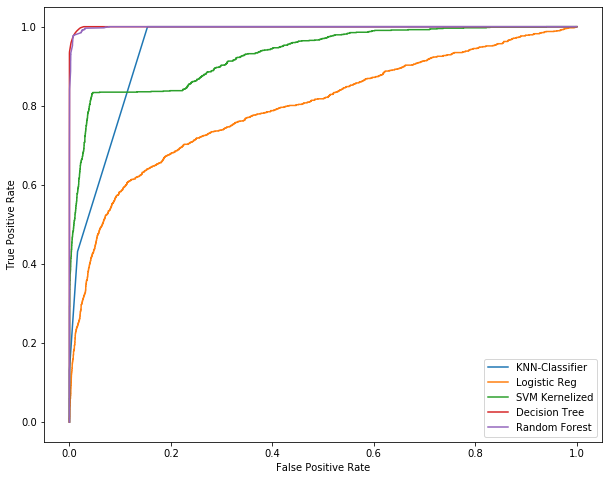

In [149]:
Classification_Result = run_models(X_train,X_test, models, params,'f1')
Classification_Result

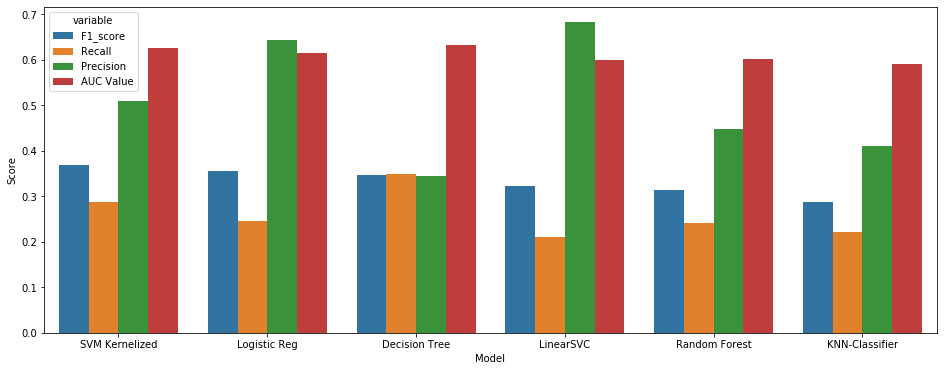

In [150]:
plt.figure(figsize=(16, 6))
df = pd.melt(Classification_Result, id_vars='Model', value_vars=['F1_score','Recall','Precision','AUC Value'], value_name="Score")
ax = sns.barplot(x='Model', y='Score', hue = 'variable', data=df)

## PCA

Model: KNN-Classifier
Parameter(Optimum): {'n_neighbors': 3}
Cross-validation score: 0.31
[[  88  259]
 [ 119 2622]]
Model: Logistic Reg
Parameter(Optimum): {'C': 10, 'solver': 'lbfgs'}
Cross-validation score: 0.32
[[  71  276]
 [  58 2683]]
Model: LinearSVC
Parameter(Optimum): {'C': 0.1}
Cross-validation score: 0.30
[[  60  287]
 [  39 2702]]
Model: SVM Kernelized
Parameter(Optimum): {'C': 15, 'gamma': 0.1, 'kernel': 'rbf'}
Cross-validation score: 0.33
[[  72  275]
 [  62 2679]]
Model: Decision Tree
Parameter(Optimum): {'criterion': 'gini', 'max_depth': 25, 'max_features': 'auto'}
Cross-validation score: 0.32
[[ 104  243]
 [ 244 2497]]
Model: Random Forest
Parameter(Optimum): {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto'}
Cross-validation score: 0.32
[[  75  272]
 [  58 2683]]


,Model,Best_Parameter,Training_score,Testing_score,F1_score,Recall,Precision,AUC Value
KNN-Classifier,KNN-Classifier,{'n_neighbors': 3},0.919231,0.877591,0.31769,0.253602,0.425121,0.605094
Random Forest,Random Forest,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.929057,0.893135,0.3125,0.216138,0.56391,0.597489
SVM Kernelized,SVM Kernelized,"{'C': 15, 'gamma': 0.1, 'kernel': 'rbf'}",0.914696,0.890868,0.299376,0.207493,0.537313,0.592437
Decision Tree,Decision Tree,"{'criterion': 'gini', 'max_depth': 25, 'max_fe...",0.986718,0.842293,0.299281,0.299712,0.298851,0.605347
Logistic Reg,Logistic Reg,"{'C': 10, 'solver': 'lbfgs'}",0.895368,0.891839,0.298319,0.204611,0.550388,0.591725
LinearSVC,LinearSVC,{'C': 0.1},0.896339,0.89443,0.269058,0.172911,0.606061,0.579341


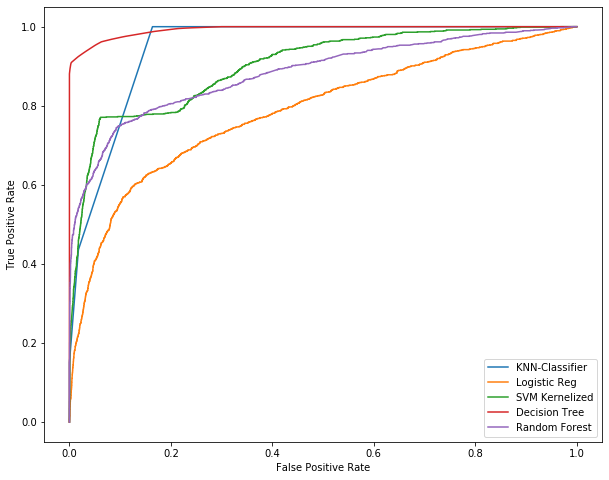

In [151]:
Classification_Result_PCA = run_models(X_train_reduced_Bf,X_test_reduced_Bf, models, params, 'f1')
Classification_Result_PCA

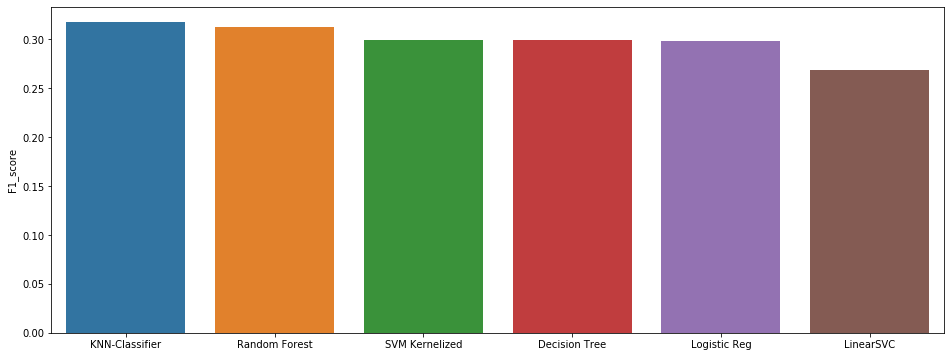

In [152]:
plt.figure(figsize=(16, 6))
ax = sns.barplot(x=Classification_Result_PCA.index, y="F1_score", data=Classification_Result_PCA)

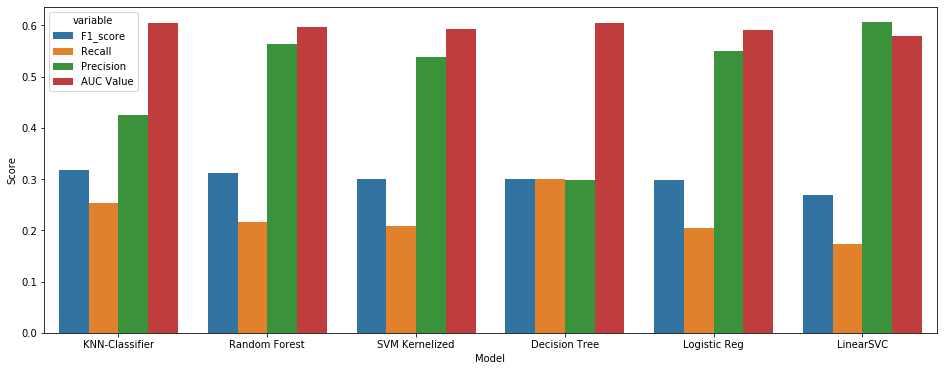

In [153]:
plt.figure(figsize=(16, 6))
df = pd.melt(Classification_Result_PCA, id_vars='Model', value_vars=['F1_score','Recall','Precision','AUC Value'], value_name="Score")
ax = sns.barplot(x='Model', y='Score', hue = 'variable', data=df)

In [154]:
Compare_Result_means=pd.DataFrame(columns=['Data','F1_score','Recall','Precision'],
                                   index=['No PCA','PCA'])
Compare_Result_means.loc['No PCA'] =['No PCA',Classification_Result.F1_score.mean(),Classification_Result.Recall.mean(),Classification_Result.Precision.mean()]
Compare_Result_means.loc['PCA'] =['PCA',Classification_Result_PCA.F1_score.mean(),Classification_Result_PCA.Recall.mean(),Classification_Result_PCA.Precision.mean()]
Compare_Result_means

,Data,F1_score,Recall,Precision
No PCA,No PCA,0.332232,0.259366,0.50625
PCA,PCA,0.299371,0.225744,0.49694


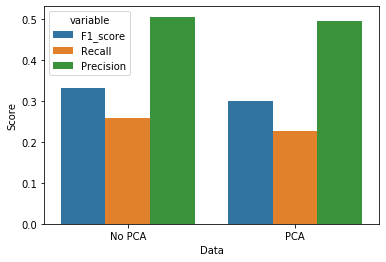

In [155]:
df = pd.melt(Compare_Result_means, id_vars='Data', value_vars=['F1_score','Recall','Precision'], value_name="Score")
ax = sns.barplot(x='Data', y='Score', hue = 'variable', data=df)

In [156]:
from sklearn.ensemble import VotingClassifier

svm_clf = SVC(gamma=0.1, probability = True)
svm_clf.fit(X_train, y_train)
log_clf = LogisticRegression(solver='lbfgs')
log_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(3)
knn_clf.fit(X_train, y_train)
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)


voting_clf = VotingClassifier(estimators=[('rf',rf_clf),('svc', svm_clf), ('lr', log_clf), ('knn', knn_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_test)
print(skm.confusion_matrix(y_test, y_pred,labels=[1,0]))
print(skm.f1_score(y_test, y_pred,labels=[1,0]))

[[  67  280]
 [  42 2699]]
0.29385964912280704


In [157]:
print(skm.classification_report(y_test, y_pred,labels=[1,0]))

              precision    recall  f1-score   support

           1       0.61      0.19      0.29       347
           0       0.91      0.98      0.94      2741

    accuracy                           0.90      3088
   macro avg       0.76      0.59      0.62      3088
weighted avg       0.87      0.90      0.87      3088



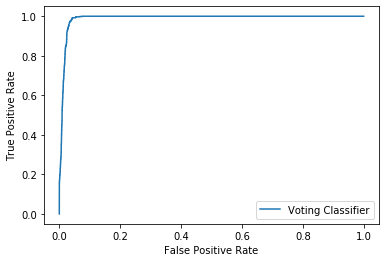

In [159]:
y_train_prob = voting_clf.predict_proba(X_train)
fpr, tpr, threshold = roc_curve(y_train, y_train_prob[:,1])
plt.plot(fpr, tpr, label = 'Voting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()     

In [160]:
# result3 = pd.DataFrame(grid_search3.cv_results_)
# result3[['param_C','mean_train_score','mean_test_score']]

# plt.plot(range(result3.shape[0]), result3['mean_train_score'], label = 'mean train score')
# plt.plot(range(result3.shape[0]), result3['mean_test_score'], label = 'mean test score')
# plt.xticks(range(result3.shape[0]), result3['param_C'], rotation = 90)
# plt.plot([grid_search3.best_index_], result3['mean_train_score'][grid_search3.best_index_], 'o', markersize = 10, fillstyle = "none")
# plt.plot([grid_search3.best_index_], result3['mean_test_score'][grid_search3.best_index_], 'o', markersize = 10, fillstyle = "none")
# plt.grid()
# plt.legend()

### AdaBoost for Decision Tree Classifier, Logistic Regression 

In [179]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier

#AdaBoost with DecisionTree Classifier
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=1, random_state=0)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [164]:
print('Train score: {:.2f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_clf.score(X_test, y_test)))

Train score: 0.90
Test score: 0.90


In [165]:
#AdaBoost with Logistic Regression
ada_clf = AdaBoostClassifier(
    LogisticRegression(), n_estimators=200,
    algorithm="SAMME.R", learning_rate=1, random_state=0)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='warn',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=None,
                                                     solver='warn', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=1, n_estimators=200, random_state=0)

In [166]:
print('Train score: {:.2f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_clf.score(X_test, y_test)))

Train score: 0.90
Test score: 0.89


### Gradient Boosting 

In [174]:
#GradientBoost Classfier
from  sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.909
Accuracy on test set: 0.896


### Bagging - DecisionTreeClassifier - (Out of Bag), RandomForest Classifier and Ridge Classifier 

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train = X_train.astype(int)
y_train = y_train.astype(int)
X_test = X_test.astype(int)
y_test = y_test.astype(int)

In [176]:
#Out of bag- Decision Tree
bag_clf = BaggingClassifier(
DecisionTreeClassifier(random_state=42), n_estimators=500,
max_samples=100, bootstrap=True, n_jobs=-1, random_state=42,
oob_score = True)

dt_bag = bag_clf.fit(X_train, y_train)

print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

Train score: 0.90
Test score: 0.90


In [177]:
#Bagging - RandomForest
rf = RandomForestClassifier()
bag_clf = BaggingClassifier(rf, n_estimators=500, max_samples=100, bootstrap=True, random_state=0)

import warnings
warnings.filterwarnings("ignore")

rf_bag = bag_clf.fit(X_train, y_train)

print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

Train score: 0.89
Test score: 0.89


In [180]:
#Bagging - Ridge
rg = RidgeClassifier()
bag_clf = BaggingClassifier(rg, n_estimators=500, max_samples=100, bootstrap=True, random_state=0)
rg_bag = bag_clf.fit(X_train, y_train)

print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

Train score: 0.90
Test score: 0.89


### Pasting with KNeighborsClassfier and SVC

In [181]:
#KNeighborsClassifier with Pasting
kn = KNeighborsClassifier()
bag_reg = BaggingClassifier(kn, n_estimators=500, max_samples=100, bootstrap=False, random_state=0)

kn_bag = bag_reg.fit(X_train, y_train)

print('Train score: {:.2f}'.format(bag_reg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_reg.score(X_test, y_test)))

Train score: 0.89
Test score: 0.89


In [182]:
#SVC - rbf with Pasting
from sklearn.svm import SVC
svc = SVC(kernel='rbf', C=100, gamma='auto')
bag_reg = BaggingClassifier(svc, n_estimators=500, max_samples=100, bootstrap=False, random_state=0)

svc_bag = bag_reg.fit(X_train, y_train)

print('Train score: {:.2f}'.format(bag_reg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_reg.score(X_test, y_test)))

Train score: 0.88
Test score: 0.89
